In [ ]:
import math
import matplotlib.pyplot as plt

from Helpers import loadData, saveData, medi, axialNormalization, sharpen

In [2]:
# Load data file
data = loadData(r'/home/snow/Coding/Granular-Compression/Data','downscale_17.hdf5')

In [3]:
# Apply 3d median filter to remove salt and pepper 
medData = medi(data)

In [4]:
# Take normalization along an axis and apply gaussian filter
normedData = axialNormalization(medData, 'c')
sharpData = sharpen(normedData)

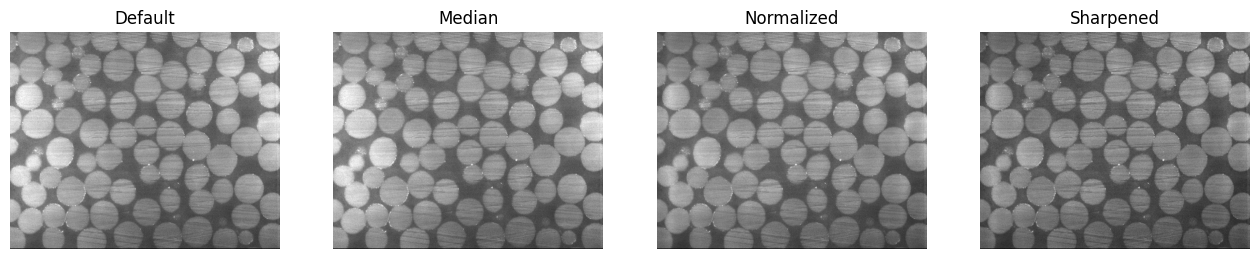

In [8]:
# Plot process
fig, axs = plt.subplots(1, 4, figsize=(16, 4)) 
ax1,ax2,ax3,ax4 = axs.flatten()
loc = math.floor(len(data[0,0,:])/2)

ax1.imshow(data[:, :, loc], cmap='gray')
ax2.imshow(medData[:, :, loc], cmap='gray')
ax3.imshow(normedData[:, :, loc], cmap='gray')
ax4.imshow(sharpData[:, :, loc], cmap='gray')

ax1.set_title('Default')
ax2.set_title('Median')
ax3.set_title('Normalized')
ax4.set_title('Sharpened')

for ax in axs:
    ax.axis('off')

plt.show()

In [ ]:
# Save processed data for later use
loc = r'/home/snow/Coding/Granular-Compression/Data'
name = 'processedDown_17.hdf5'

saveData(sharpData,location=loc,saveName=name)

In [100]:
import numpy as np
from skimage import feature
import napari
from scipy.ndimage import uniform_filter

In [ ]:
image = medData[:,:,20]

window_size=50

local_mean = uniform_filter(image, size=window_size)
local_sq_mean = uniform_filter(image**2, size=window_size)
local_std = np.sqrt(np.maximum(local_sq_mean - local_mean**2, 0))
    
normalized = (image - local_mean) / (local_std + 1e-10)

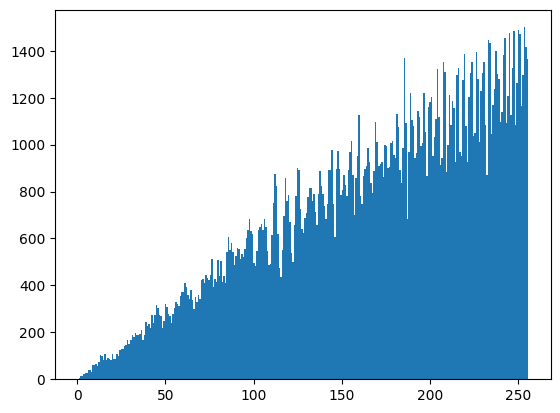

In [115]:
plt.hist(local_std.flatten(),bins=300);

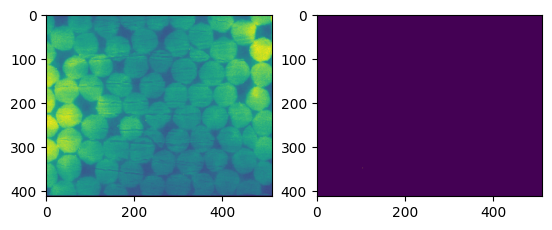

In [102]:
plt.subplot(1,2,1)
plt.imshow(medData[:,:,20])
plt.subplot(1,2,2)
plt.imshow(normalized)

In [51]:
def bina(img, thresh):
    ha = np.copy(img)
    ha[ha >= thresh] = 1
    ha[ha <  thresh] = 0
    return ha

In [128]:
meow = np.copy(sharpData)
stack = np.zeros(np.shape(meow))

s = .5
rdim,cdim,zdim = np.shape(meow)

for idr in range(rdim):
    stack[idr,:,:] += feature.canny(meow[idr,:,:],sigma=s)
for idz in range(zdim):
    stack[:,:,idz] += feature.canny(meow[:,:,idz],sigma=s)

In [135]:
s = 3
stack2 = np.zeros(np.shape(meow))

for idr in range(rdim):
    stack2[idr,:,:] += feature.canny(stack[idr,:,:],sigma=s)
for idz in range(zdim):
    stack2[:,:,idz] += feature.canny(stack[:,:,idz],sigma=s)

In [136]:
viewer, image_layer = napari.imshow(stack2, rgb=False)

In [137]:
meow = np.copy(sharpData)
stack = np.zeros(np.shape(meow))

s = .5
rdim,cdim,zdim = np.shape(meow)

for idr in range(rdim):
    stack[idr,:,:] += feature.canny(meow[idr,:,:],sigma=s)
for idc in range(cdim):
    stack[:,idc,:] += feature.canny(meow[:,idc,:],sigma=s)
for idz in range(zdim):
    stack[:,:,idz] += feature.canny(meow[:,:,idz],sigma=s)

In [127]:
me = np.copy(stack)
me[me < 1] = 0
viewer, image_layer = napari.imshow(me, rgb=False)

In [138]:
viewer, image_layer = napari.imshow(stack, rgb=False)

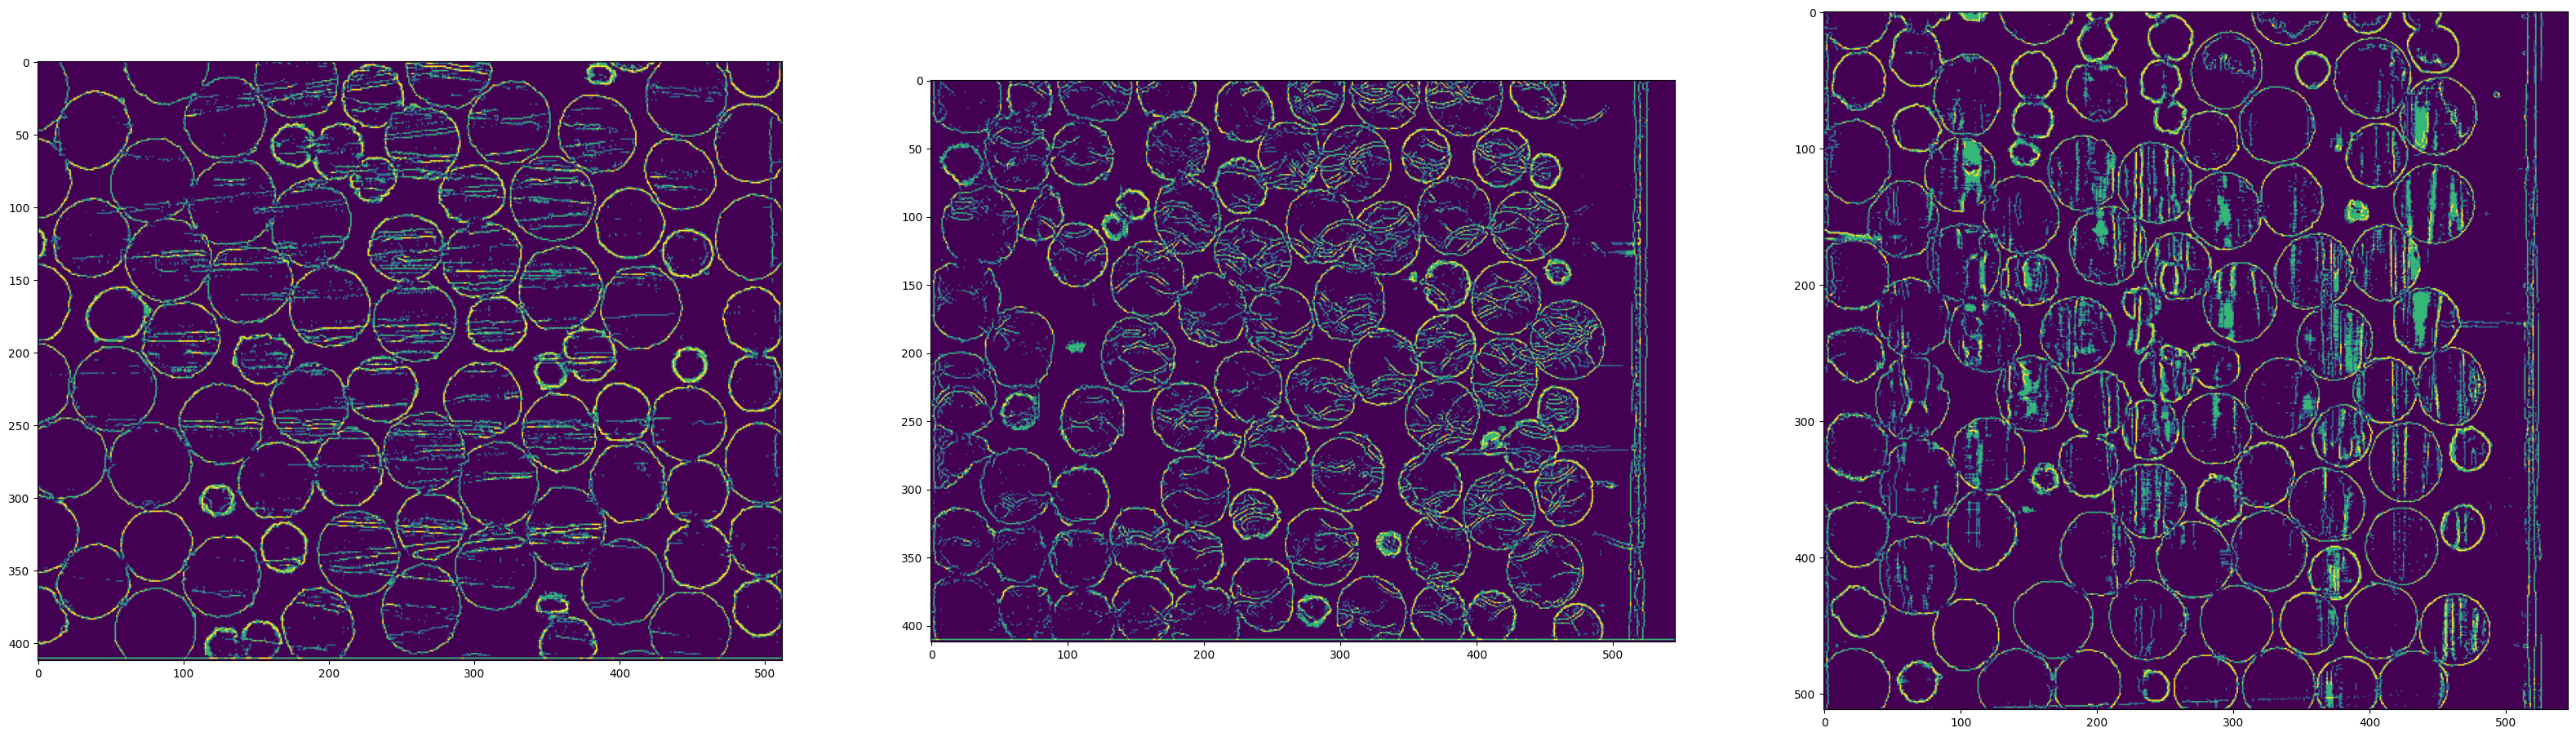

In [87]:
plt.figure(figsize=(40,20))
a = 250
count = 3

plt.subplot(1,count,1)
plt.imshow(stack[:,:,a])
plt.subplot(1,count,2)
plt.imshow(stack[:,a,])
plt.subplot(1,count,3)
plt.imshow(stack[a,:,])

In [71]:
cat = np.copy(sharpData)
can = np.zeros(np.shape(cat))
cant =np.zeros(np.shape(cat))

_,__,zdim = cat.shape
cdim,_,__ = cat.shape
for idx in range(zdim):
    can[:,:,idx] = feature.canny(cat[:,:,idx])
    
for idx in range(cdim):
    cant[idx,:,:] = feature.canny(cat[idx,:,:])

doge = can + cant

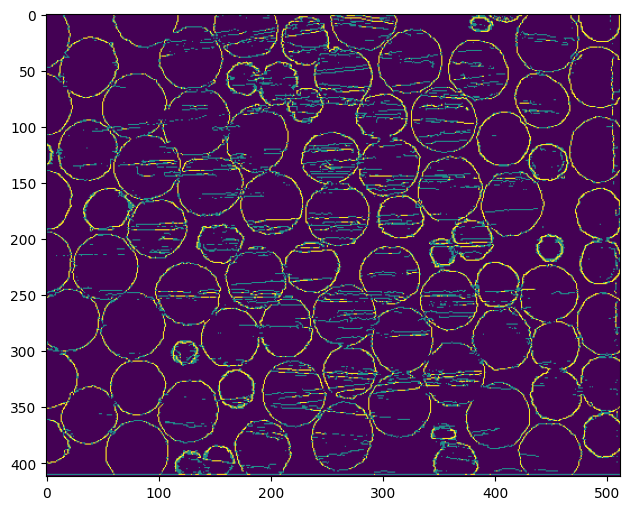

In [78]:
plt.figure(figsize=(20,6))
a = 250
count = 1

plt.subplot(1,count,1)
plt.imshow(doge[:,:,a])
#plt.subplot(1,count,2)
#lt.imshow(c2)
#plt.subplot(1,count,3)
#plt.imshow(c3)

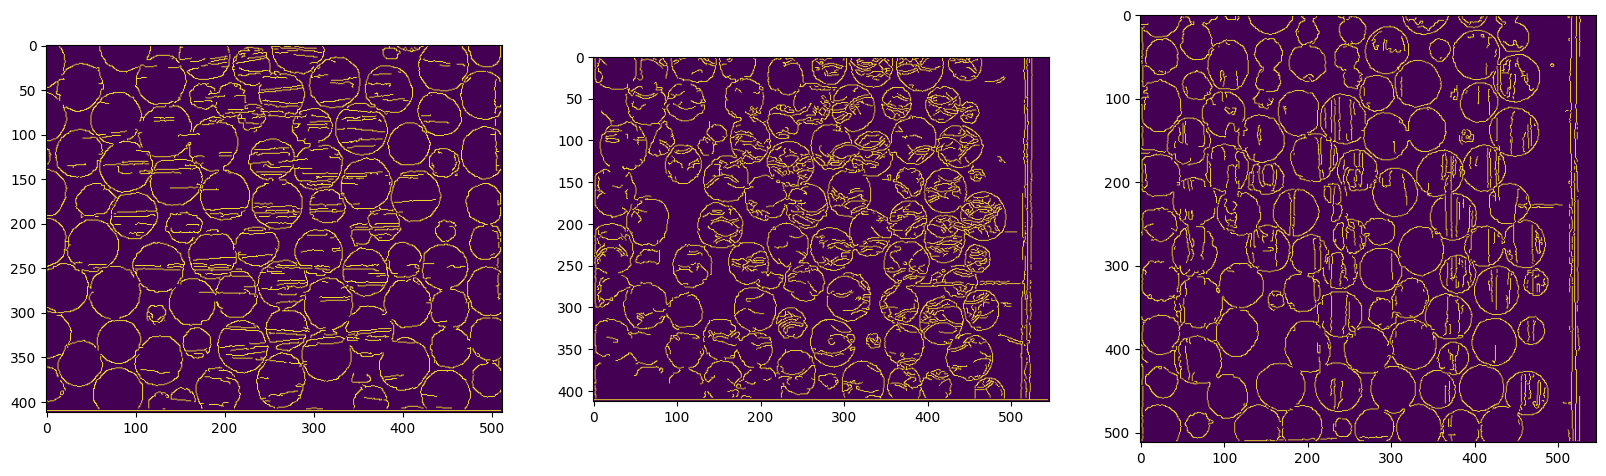

In [69]:
plt.figure(figsize=(20,6))

a = 250
thr = .5
count = 3

i1,i2,i3 = cat[:,:,a], cat[:,a,:], cat[a,:,:]
b1,b2,b3 = bina(i1,thr),bina(i2,thr),bina(i2,thr)
c1,c2,c3 = feature.canny(i1),feature.canny(i2),feature.canny(i3)

plt.subplot(1,count,1)
plt.imshow(c1)
plt.subplot(1,count,2)
plt.imshow(c2)
plt.subplot(1,count,3)
plt.imshow(c3)

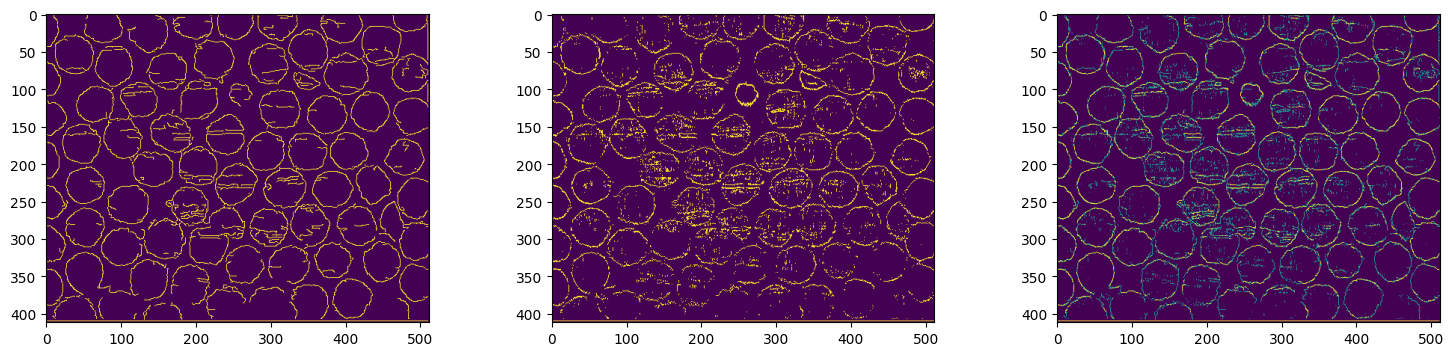

In [44]:
plt.figure(figsize=(25,4))

plt.subplot(1,4,1)
plt.imshow(can[:,:,10])
plt.subplot(1,4,2)
plt.imshow(cant[:,:,10])
plt.subplot(1,4,3)
plt.imshow(doge[:,:,10])

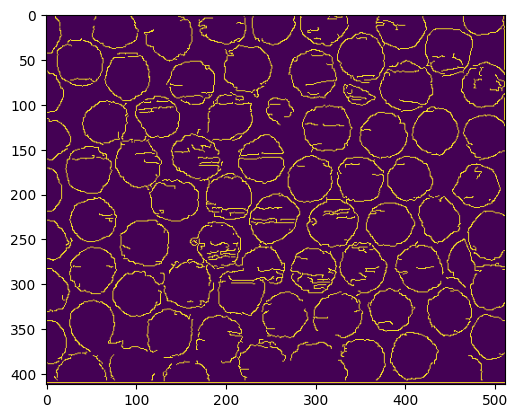

In [35]:
plt.imshow(can[:,:,10])

In [37]:
from skimage import data

import napari

viewer, image_layer = napari.imshow(can, rgb=False)

/home/snow/Coding/Granular-Compression/.venv/lib/python3.13/site-packages/napari/_qt/widgets/qt_dims.py:324: UserWarning: Refusing to play a hidden axis
  warnings.warn(


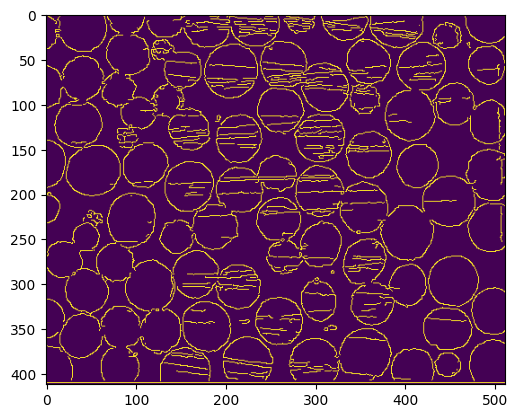

In [25]:
cat = np.copy(sharpData)
plt.imshow(feature.canny(cat[:,:,loc]))

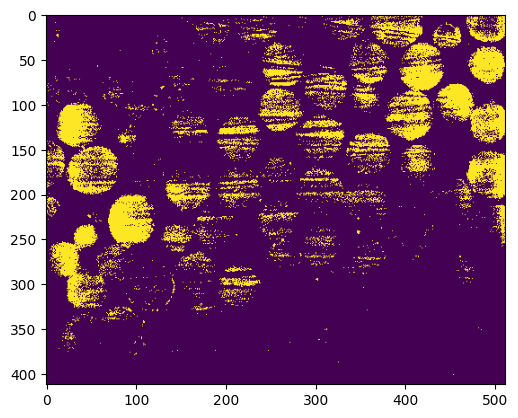

In [23]:
dog = np.copy(sharpData)
val = .5
dog[dog < val] = 0
dog[dog >=val] = 1
plt.imshow(dog[:,:,loc])

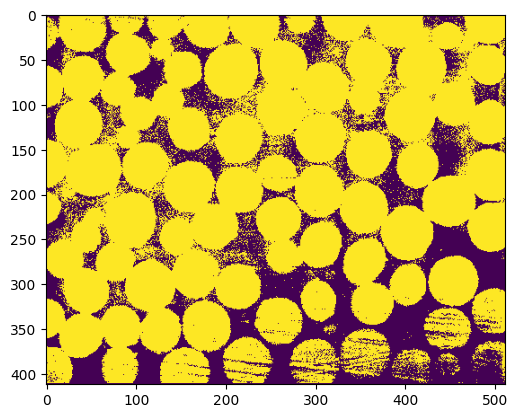